In [ ]:
import pandas as pd
import numpy as np
import csv

from plotly import graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import string

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML models/Daily_consumption_EL_FJV/Tallbacka/Tallbacka_with_weather.csv')

The file "Tallbacka_with_weather.csv" contains daily data on electricity consumption in Tallbacka, Sweden, along with corresponding weather information. This data can be used to analyze the relationship between electricity consumption and weather factors like temperature, daylight hours, precipitation, and wind speed, potentially revealing patterns and insights into energy usage trends.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA

# Check if 'Date' column exists
if 'Date' not in df.columns:
    print("Date column is missing from the dataframe")
else:
    # Convert 'Date' to datetime
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

    # Check if there are any NaT values after conversion
    if df['Date'].isnull().any():
        print("Some values in 'Date' could not be converted to datetime")
    else:
        # Set 'Date' as the index
        df.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(df['Consumption'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Create a date range for the forecasted period
forecast_dates = pd.date_range(df.index[-1], periods=31, freq='D')[1:]

# Create the interactive plot
fig = go.Figure()

# Add historical data to the plot
fig.add_trace(go.Scatter(x=df.index, y=df['Consumption'], mode='lines', name='Historical Data',
                         line=dict(color='blue')))

# Add forecast data to the plot
fig.add_trace(go.Scatter(x=forecast_dates, y=forecast, mode='lines', name='Forecast',
                         line=dict(color='red', dash='dash')))

# Update layout for better interactivity and set white background
fig.update_layout(
    title='Energy Consumption Forecast (Next 30 Days)',
    xaxis_title='Date',
    yaxis_title='Energy Consumption',
    template='plotly_white',  # Set white background
    hovermode='closest',
    plot_bgcolor='white',  # Set the plot background to white
    paper_bgcolor='white'  # Set the paper background to white
)

# Show the plot
fig.show()


Date column is missing from the dataframe


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
# Create a colorful interactive scatter plot with different colors for each weather code
fig = px.scatter(df,
                 x='daylight_duration (s)',
                 y='Consumption',
                 color='daylight_duration (s)',
                 title='Colorful Interactive Scatter Plot of daylight_duration (s) vs Energy Consumption',
                 labels={'daylight_duration (s)': 'daylight_duration (s)',
                        'Consumption': 'Energy Consumption'},
                 hover_data=['daylight_duration (s)', 'daylight_duration (s)'])

# Update layout
fig.update_layout(
    title_x=0.5,
    plot_bgcolor='white',
    width=900,
    height=600
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')


fig.show()


In [ ]:
import plotly.express as px
import plotly.io as pio

# Create interactive scatter plot with color based on temperature
fig = px.scatter(df,
                 x='weather_code (wmo code)',
                 y='Consumption',
                 color='weather_code (wmo code)',  # Adding color based on temperature
                 color_continuous_scale='viridis',  # Using a colorful scale
                 title='Interactive Scatter Plot of Weather Code vs Energy Consumption',
                 labels={'weather_code (wmo code)': 'Weather Code (WMO Code)',
                        'Consumption': 'Energy Consumption',
                        'weather_code (wmo code)': 'weather_code (wmo code)'},
                 hover_data=['weather_code (wmo code)', 'weather_code (wmo code)'])

# Update layout
fig.update_layout(
    title_x=0.5,
    plot_bgcolor='white',
    width=900,
    height=600
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.show()

In [ ]:
# Create a colorful interactive scatter plot with different colors for each weather code
fig = px.scatter(df,
                 x='temperature_2m_max (°C)',
                 y='Consumption',
                 color='temperature_2m_max (°C)',
                 title='Colorful Interactive Scatter Plot of temperature_2m_max (°C) vs Energy Consumption',
                 labels={'temperature_2m_max (°C)': 'temperature_2m_max (°C)',
                        'Consumption': 'Energy Consumption'},
                 hover_data=['temperature_2m_max (°C)', 'temperature_2m_max (°C)'])

# Update layout
fig.update_layout(
    title_x=0.5,
    plot_bgcolor='white',
    width=900,
    height=600
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')


fig.show()

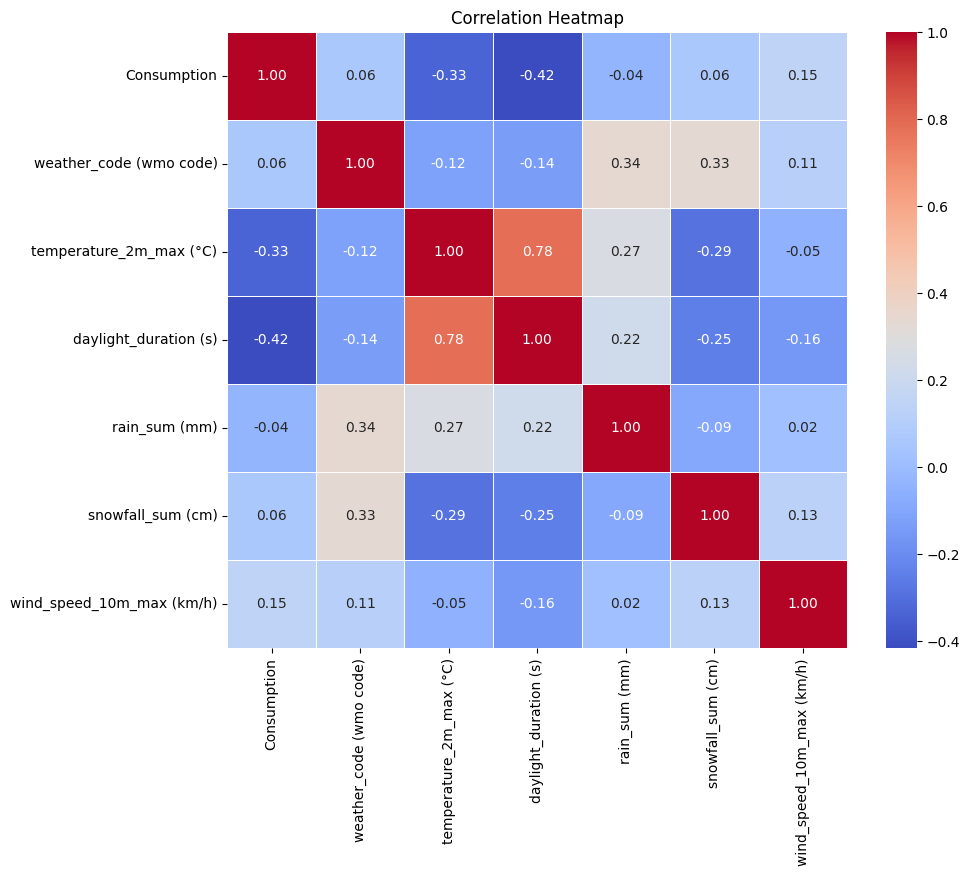

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.corr()  # Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
# Print correlations with Consumption
print("\
Correlations with Energy Consumption:")
for var, corr in correlations.items():
    if var != 'Consumption':
        print(f"{var}: {corr:.3f}")


Correlations with Energy Consumption:
wind_speed_10m_max (km/h): 0.145
snowfall_sum (cm): 0.065
weather_code (wmo code): 0.064
rain_sum (mm): -0.036
temperature_2m_max (°C): -0.333
daylight_duration (s): -0.416


In [ ]:
# Calculate R-squared values
r_squared = {}
for column in df.columns:
    if column != 'Consumption' and column != 'Date':
        slope, intercept, r_value, p_value, std_err = stats.linregress(df[column], df['Consumption'])
        r_squared[column] = r_value ** 2

print("\
R-squared values:")
for var, r2 in sorted(r_squared.items(), key=lambda x: x[1], reverse=True):
    print(f"{var}: {r2:.3f}")

R-squared values:
daylight_duration (s): 0.173
temperature_2m_max (°C): 0.111
wind_speed_10m_max (km/h): 0.021
snowfall_sum (cm): 0.004
weather_code (wmo code): 0.004
rain_sum (mm): 0.001


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Consumption', 'temperature_2m_max (°C)', 'temperature_2m_max (°C)',
                                    'temperature_2m_max (°C)', 'rain_sum (mm)', 'snowfall_sum (cm)',
                                    'wind_speed_10m_max (km/h)']])

# Perform PCA to reduce to 2 dimensions
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_2d)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Create an interactive scatter plot for PCA clusters
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cluster',
                 title='Interactive PCA Clusters',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'})

# Update layout
fig.update_layout(
    title_x=0.5,
    plot_bgcolor='white',
    width=900,
    height=600
)

fig.show()
